## Data Loading and Inspection

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import re

In [6]:
#Import data from ObesityDataSet
obesity_data = Path("Data/ObesityDataSet_raw_and_data_synthetic.csv")
obesity_data = pd.read_csv(obesity_data)
pd.set_option('display.max_columns', None)
obesity_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
# Define the target column
target_column = 'NObeyesdad'

# Separate the features and the target
feature_columns = [col for col in obesity_data.columns if col != target_column]
feature_df = obesity_data[feature_columns]
y = obesity_data[target_column]

In [4]:
# Functions used to convert data
def yesNoBinaryConversion(input_series):
    input_series.replace('yes', 1, inplace=True)
    input_series.replace('no', 0, inplace=True)

def weightReplacement(input_series):
    replace_dictionary = {r"\binsufficient": '0',
                          r"\bnormal": '1',
                          r"\boverweight": '2',
                          r"\bobesity": '3'}
    for index, value in enumerate(input_series):
        for key, item in replace_dictionary.items():
            find_ = re.findall(key, value, re.I)
            if find_:
                input_series.replace(value, item, inplace=True)

def integerBuckets(input_series):
    for index, value in enumerate(input_series):
        if value > 3.5:
            input_series.replace(value, 4, inplace=True)
        elif value > 2.5:
            input_series.replace(value, 3, inplace=True)
        elif value > 1.5:
            input_series.replace(value, 2, inplace=True)
        else:
            input_series.replace(value, 1, inplace=True)

def categoricalBuckets(input_series):
    for index, value in enumerate(input_series):
        if value > 2.5:
            input_series.replace(value, 'Always', inplace=True)
        elif value > 1.5:
            input_series.replace(value, 'Frequently', inplace=True)
        else:
            input_series.replace(value, 'Sometimes', inplace=True)

In [5]:
# Apply yesNoBinaryConversion to relevant columns
yesNoBinaryConversion(obesity_data['FAVC'])
yesNoBinaryConversion(obesity_data['SMOKE'])
yesNoBinaryConversion(obesity_data['SCC'])

# Apply integerBuckets to relevant columns
integerBuckets(obesity_data['NCP'])
integerBuckets(obesity_data['CH2O'])
integerBuckets(obesity_data['FAF'])
integerBuckets(obesity_data['TUE'])

# Apply categoricalBuckets to relevant columns
categoricalBuckets(obesity_data['FCVC'])

/var/folders/6y/q85ngpfd649cw8503ftfc2tr0000gn/T/ipykernel_58502/1861512055.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  input_series.replace('no', 0, inplace=True)


In [6]:
# Inspecting the features_df
feature_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [7]:
# Convert categorical variables to numeric using one-hot encoding
feature_df  = pd.get_dummies(feature_df,  dtype=int)

In [8]:
# Check DataTypes after converting
feature_df.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                           int64
Gender_Male                             int64
family_history_with_overweight_no       int64
family_history_with_overweight_yes      int64
FAVC_no                                 int64
FAVC_yes                                int64
CAEC_Always                             int64
CAEC_Frequently                         int64
CAEC_Sometimes                          int64
CAEC_no                                 int64
SMOKE_no                                int64
SMOKE_yes                               int64
SCC_no                                  int64
SCC_yes                           

## Data Engineering with Original Dataset using SVM


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
# Target Data
y

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

In [11]:
# Requires to normalise the target data 
print(obesity_data[target_column].value_counts())



NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [12]:
# Apply function to normalise the data
weightReplacement(obesity_data['NObeyesdad'])


In [13]:
#Check data after applying the fuction
print(obesity_data['NObeyesdad'])

0       1
1       1
2       1
3       2
4       2
       ..
2106    3
2107    3
2108    3
2109    3
2110    3
Name: NObeyesdad, Length: 2111, dtype: object


In [14]:
# Create new feature 'BMI'
feature_df['BMI'] = feature_df['Weight'] / (feature_df['Height'] ** 2)

# Features 
X = feature_df.copy()

#Target
y = obesity_data[target_column]


In [15]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [17]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [18]:

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 54   2   0   0]
 [  1  59   2   0]
 [  0   0 105   1]
 [  0   0   0 199]]


In [19]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.97      0.95      0.96        62
           2       0.98      0.99      0.99       106
           3       0.99      1.00      1.00       199

    accuracy                           0.99       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.99      0.99      0.99       423



### Making predictions using original dataset without height, weight & BMI

In [20]:
# Drop unwanted columns
feature_df.drop(columns=['Height', 'Weight' , 'BMI'], inplace = True)

In [21]:
# Features 
X = feature_df.copy()

#Target
y = obesity_data[target_column]


In [22]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [19]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [20]:

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 49   2   2   3]
 [ 25  16  16   5]
 [  9   7  36  54]
 [  2   2   9 186]]


In [21]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.58      0.88      0.70        56
           1       0.59      0.26      0.36        62
           2       0.57      0.34      0.43       106
           3       0.75      0.93      0.83       199

    accuracy                           0.68       423
   macro avg       0.62      0.60      0.58       423
weighted avg       0.66      0.68      0.64       423



## Data Engineering with Pre-Processed data With height & weight using SVM

In [42]:
#Import Processed Obesity Data with weigh & height
obesity_data_with_weights = Path("Data/processed_obesity_data_YES_WEIGHT.csv")
obesity_data_with_weights = pd.read_csv(obesity_data_with_weights)
pd.set_option('display.max_columns', None)
obesity_data_with_weights

,Age,Height,Weight,Overweight_Family_History,High_Caloric_Food_Frequency,Mmain_Meals_per_Day,Smoking_Status,Daily_Water_Intake_L,Monitor_Calorie_Intake,Physical_Activity,Screentime_hrs,BMI,Gender_Female,Gender_Male,Meal_Vegetable_Intake_Always,Meal_Vegetable_Intake_Frequently,Meal_Vegetable_Intake_Sometimes,Food_Between_Meals_Always,Food_Between_Meals_Frequently,Food_Between_Meals_Sometimes,Food_Between_Meals_no,Alcohol_Frequency_Always,Alcohol_Frequency_Frequently,Alcohol_Frequency_Sometimes,Alcohol_Frequency_no,Mode_of_Transportaion_Automobile,Mode_of_Transportaion_Bike,Mode_of_Transportaion_Motorbike,Mode_of_Transportaion_Public_Transportation,Mode_of_Transportaion_Walking,Obesity_Level
0,21.0,1.620000,64.000000,1,0,0.0,0,2.0,0,0.0,1.0,24.387,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
1,21.0,1.520000,56.000000,1,0,0.0,1,3.0,1,3.0,0.0,24.238,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
2,23.0,1.800000,77.000000,1,0,0.0,0,2.0,0,2.0,1.0,23.765,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
3,27.0,1.800000,87.000000,0,0,0.0,0,2.0,0,2.0,0.0,26.852,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,2
4,22.0,1.780000,89.800000,0,0,0.0,0,2.0,0,0.0,0.0,28.342,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21.0,1.710730,131.408528,1,1,0.0,0,2.0,0,1.0,1.0,44.901,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,3
2107,22.0,1.748584,133.742943,1,1,0.0,0,2.0,0,1.0,0.0,43.742,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,3
2108,23.0,1.752206,133.689352,1,1,0.0,0,2.0,0,1.0,0.0,43.544,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,3
2109,24.0,1.739450,133.346641,1,1,0.0,0,3.0,0,1.0,0.0,44.072,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,3


In [43]:
# Define the target column
target_column = 'Obesity_Level'

# Separate the features and the target
feature_columns = [col for col in obesity_data_with_weights.columns if col != target_column]
feature_df_no_weights = obesity_data_with_weights[feature_columns]
y = obesity_data_with_weights[target_column]

In [46]:
# Features 
X = feature_df_no_weights.copy()

#Target
y = obesity_data_with_weights[target_column]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_mode_with_weights = SVC(kernel='linear', probability=True)
svm_mode_with_weights.fit(X_train, y_train)
# Make predictions
y_pred_1 = svm_mode_with_weights.predict(X_test)
report_with_height_and_weight = print(classification_report(y_test_1, y_pred_1))
report_with_height_and_weight

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.95      0.98      0.97        62
           2       1.00      0.98      0.99       106
           3       0.99      1.00      1.00       199

    accuracy                           0.99       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.99      0.99      0.99       423



In [48]:
# Generate classification report
report_with_height_and_weight = classification_report(y_test_1, y_pred_1, output_dict=True)

# Extract metrics for precision, recall, and accuracy
metrics_with_height_and_weight = {
        'Metric': ['Precision', 'Recall', 'Accuracy'],
        'Score': [
            report_with_height_and_weight['weighted avg']['precision'],
            report_with_height_and_weight['weighted avg']['recall'],
            report_with_height_and_weight['accuracy']
        ],
        'Model': ['With Height and Weight'] * 3
    }

# Create DataFrame
df_with_height_and_weight = pd.DataFrame(metrics_with_height_and_weight)

# Save the DataFrame to a CSV file
results_csv_path = 'report_with_height_and_weight.csv'
df_with_height_and_weight.to_csv(results_csv_path, index=False)



## Data Engineering with Pre-Processed data Without height & weight using SVM

In [49]:
#Import Processed Obesity Data without weight & height
obesity_data_no_weights = Path("Data/processed_obesity_data_NO_WEIGHT.csv")
obesity_data_no_weights = pd.read_csv(obesity_data_no_weights)
pd.set_option('display.max_columns', None)
obesity_data_no_weights


,Age,Overweight_Family_History,High_Caloric_Food_Frequency,Mmain_Meals_per_Day,Smoking_Status,Daily_Water_Intake_L,Monitor_Calorie_Intake,Physical_Activity,Screentime_hrs,Gender_Female,Gender_Male,Meal_Vegetable_Intake_Always,Meal_Vegetable_Intake_Frequently,Meal_Vegetable_Intake_Sometimes,Food_Between_Meals_Always,Food_Between_Meals_Frequently,Food_Between_Meals_Sometimes,Food_Between_Meals_no,Alcohol_Frequency_Always,Alcohol_Frequency_Frequently,Alcohol_Frequency_Sometimes,Alcohol_Frequency_no,Mode_of_Transportaion_Automobile,Mode_of_Transportaion_Bike,Mode_of_Transportaion_Motorbike,Mode_of_Transportaion_Public_Transportation,Mode_of_Transportaion_Walking,Obesity_Level
0,21.0,1,0,0.0,0,2.0,0,0.0,1.0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
1,21.0,1,0,0.0,1,3.0,1,3.0,0.0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
2,23.0,1,0,0.0,0,2.0,0,2.0,1.0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
3,27.0,0,0,0.0,0,2.0,0,2.0,0.0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,2
4,22.0,0,0,0.0,0,2.0,0,0.0,0.0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21.0,1,1,0.0,0,2.0,0,1.0,1.0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,3
2107,22.0,1,1,0.0,0,2.0,0,1.0,0.0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,3
2108,23.0,1,1,0.0,0,2.0,0,1.0,0.0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,3
2109,24.0,1,1,0.0,0,3.0,0,1.0,0.0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,3


In [50]:
# Define the target column
target_column = 'Obesity_Level'

# Separate the features and the target
feature_columns = [col for col in obesity_data_no_weights.columns if col != target_column]
feature_df_no_weights = obesity_data_no_weights[feature_columns]
y = obesity_data_no_weights[target_column]

In [51]:
# Features 
X = feature_df_no_weights.copy()

#Target
y = obesity_data_no_weights[target_column]

In [52]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_mode_without_weights = SVC(kernel='linear', probability=True)
svm_mode_without_weights.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [53]:
# Make predictions
y_pred = svm_mode_without_weights.predict(X_test)

In [54]:
report_without_height_and_weighht = print(classification_report(y_test, y_pred))
report_without_height_and_weighht

              precision    recall  f1-score   support

           0       0.59      0.82      0.69        56
           1       0.59      0.27      0.37        62
           2       0.62      0.37      0.46       106
           3       0.74      0.93      0.82       199

    accuracy                           0.68       423
   macro avg       0.63      0.60      0.59       423
weighted avg       0.66      0.68      0.65       423



In [56]:
# Generate classification report
report_without_height_and_weighht = classification_report(y_test_1, y_pred_1, output_dict=True)

# Extract metrics for precision, recall, and accuracy
metrics_without_height_and_weight = {
        'Metric': ['Precision', 'Recall', 'Accuracy'],
        'Score': [
            report_without_height_and_weighht['weighted avg']['precision'],
            report_without_height_and_weighht['weighted avg']['recall'],
            report_without_height_and_weighht['accuracy']
        ],
        'Model': ['With Height and Weight'] * 3
    }

# Create DataFrame
df_without_height_and_weight = pd.DataFrame(metrics_without_height_and_weight)

# Save the DataFrame to a CSV file
results_csv_path = 'report_without_height_and_weight.csv'
df_without_height_and_weight.to_csv(results_csv_path, index=False)



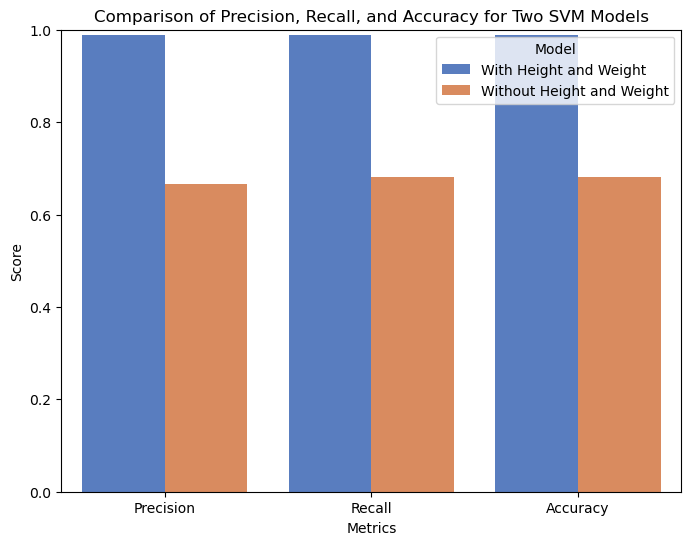

In [58]:
# Generate classification reports
report_with_height_and_weight = classification_report(y_test_1, y_pred_1, output_dict=True)
report_without_height_and_weight = classification_report(y_test, y_pred, output_dict=True)

# Extract metrics for precision, recall, and accuracy
metrics_with_height_and_weight = {
    'Metric': ['Precision', 'Recall', 'Accuracy'],
    'Score': [
        report_with_height_and_weight['weighted avg']['precision'],
        report_with_height_and_weight['weighted avg']['recall'],
        report_with_height_and_weight['accuracy']
    ],
    'Model': ['With Height and Weight'] * 3
}

metrics_without_height_and_weight = {
    'Metric': ['Precision', 'Recall', 'Accuracy'],
    'Score': [
        report_without_height_and_weight['weighted avg']['precision'],
        report_without_height_and_weight['weighted avg']['recall'],
        report_without_height_and_weight['accuracy']
    ],
    'Model': ['Without Height and Weight'] * 3
}

# Create DataFrames
df_with_height_and_weight = pd.DataFrame(metrics_with_height_and_weight)
df_without_height_and_weight = pd.DataFrame(metrics_without_height_and_weight)

# Combine the DataFrames
df_combined = pd.concat([df_with_height_and_weight, df_without_height_and_weight])

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(data=df_combined, x='Metric', y='Score', hue='Model', palette='muted')
plt.title('Comparison of Precision, Recall, and Accuracy for Two SVM Models')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.savefig('images/comparison_of_two_svm_models_plot.png')
plt.show()

## Exploratory Data Analysis (EDA)

In [7]:
# Rename the specified columns
obesity_data.rename(columns={
    'family_history_with_overweight': 'Family History With Overweight',
    'FAVC': 'High Caloric Food Frequency',
    'FCVC': 'Vegitable Intake In Meals',
    'NCP': 'How many main meals per day',
    'CAEC': 'Any Food Between Meals',
    'SMOKE': 'Do You Smoke',
    'CH2O': 'Daily Water Intake',
    'SCC': 'Do You Monitor the Calarie Intake',
    'FAF': 'Are You Physically Active',
    'TUE': 'Screentime on technological devices',
    'CALC': 'Do You Drink Alcohol',
    'MTRANS': 'Mode Of Transportaion',
    'NObeyesdad': 'Obesity level'

}, inplace=True)

In [8]:
# Replace multiple values in the 'Obesity level' column
obesity_data['Obesity level'] = obesity_data['Obesity level'].replace({
    'Obesity_Type_II': 'Obesity Type 2',
    'Obesity_Type_I': 'Obesity Type 1',
    'Obesity_Type_III': 'Obesity Type 3',
    'Overweight_Level_I': 'Overweight Level 1',
    'Overweight_Level_II': 'Overweight Level 2',
    'Normal_Weight': 'Normal Weight',
    'Insufficient_Weight': 'Insufficient Weight'
})
obesity_data

,Gender,Age,Height,Weight,Family History With Overweight,High Caloric Food Frequency,Vegitable Intake In Meals,How many main meals per day,Any Food Between Meals,Do You Smoke,Daily Water Intake,Do You Monitor the Calarie Intake,Are You Physically Active,Screentime on technological devices,Do You Drink Alcohol,Mode Of Transportaion,Obesity level
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight Level 1
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight Level 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity Type 3
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity Type 3
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity Type 3
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity Type 3


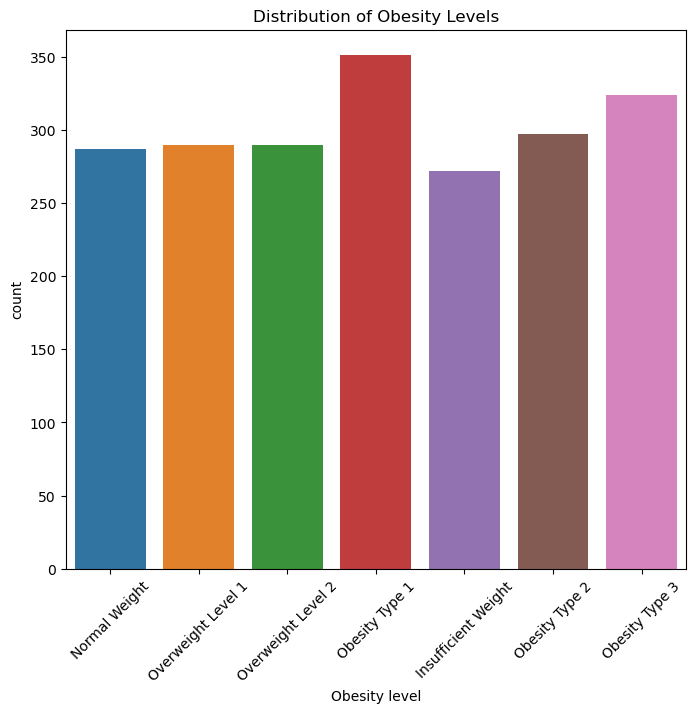

In [70]:
# Bar Plot of Obesity Levels
plt.figure(figsize=(8, 7))
sns.countplot(data=obesity_data, x='Obesity level')
plt.title('Distribution of Obesity Levels')
plt.xticks(rotation=45)
plt.savefig('images/obesity_levels_distribution.png', bbox_inches='tight')
plt.show()


/Users/suneraathukorala/anaconda3/envs/devenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


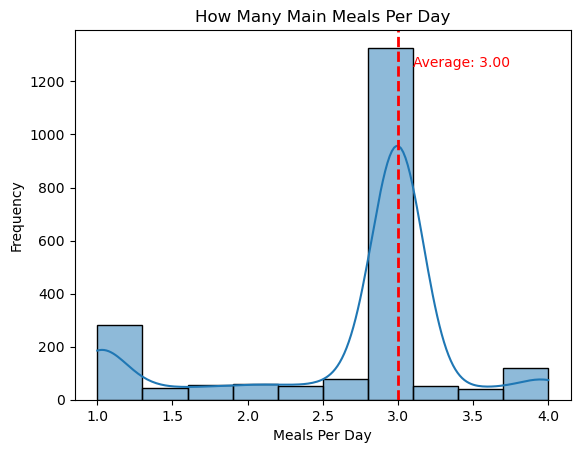

In [18]:
# Calculate the average number of main meals per day
average_meals_per_day = round(obesity_data['How many main meals per day'].mean())

# Histogram showing How Many Main Meals Per Day
sns.histplot(data=obesity_data, x='How many main meals per day', bins= 10, kde=True)
plt.title('How Many Main Meals Per Day')
plt.xlabel('Meals Per Day')
plt.ylabel('Frequency')

# Add the average line to the histogram
plt.axvline(average_meals_per_day, color='r', linestyle='dashed', linewidth=2)
plt.text(average_meals_per_day + 0.1, plt.ylim()[1] * 0.9, f'Average: {average_meals_per_day:.2f}', color='r')
plt.savefig('images/meals_per_day_histogram.png')

plt.show()


/Users/suneraathukorala/anaconda3/envs/devenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


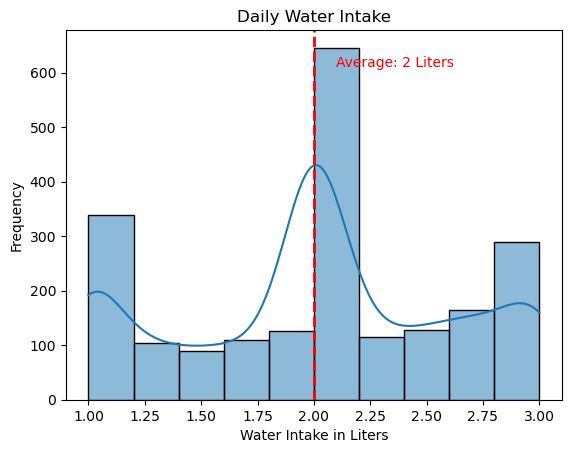

In [22]:
# Calculate the average daily water intake
average_water_intake = round(obesity_data['Daily Water Intake'].mean())

# Histogram showing Daily Water Intake Per day
sns.histplot(data=obesity_data, x='Daily Water Intake', bins= 10, kde=True)
plt.title('Daily Water Intake')
plt.xlabel('Water Intake in Liters')
plt.ylabel('Frequency')

# Add the average line to the histogram
plt.axvline(average_water_intake, color='r', linestyle='dashed', linewidth=2)
plt.text(average_water_intake + 0.1, plt.ylim()[1] * 0.9, f'Average: {average_water_intake} Liters', color='r')
plt.savefig('images/daily_water_intake_histogram.png')

plt.show()


/Users/suneraathukorala/anaconda3/envs/devenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


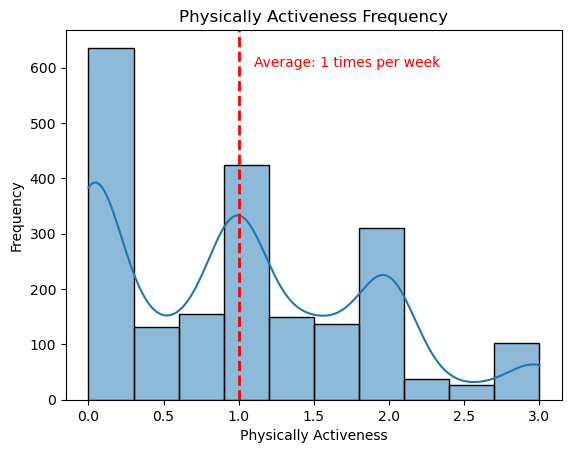

In [25]:
# Calculate the average physical activity frequency
average_physical_activity = round(obesity_data['Are You Physically Active'].mean())

# Histogram showing Are You Physically Active
sns.histplot(data=obesity_data, x='Are You Physically Active', bins= 10, kde=True)
plt.title('Physically Activeness Frequency')
plt.xlabel('Physically Activeness')
plt.ylabel('Frequency')

# Add the average line to the histogram
plt.axvline(average_physical_activity, color='r', linestyle='dashed', linewidth=2)
plt.text(average_physical_activity + 0.1, plt.ylim()[1] * 0.9, f'Average: {average_physical_activity} times per week', color='r')
plt.savefig('images/physical_activity_histogram.png')
plt.show()


/Users/suneraathukorala/anaconda3/envs/devenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


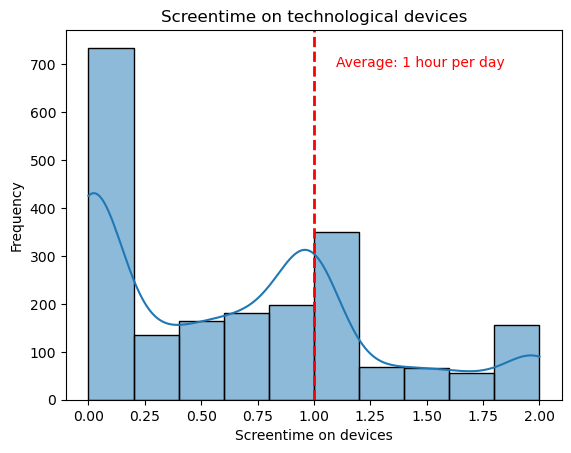

In [28]:
# Calculate the average screentime on technological devices
average_screentime = round(obesity_data['Screentime on technological devices'].mean())

# Histogram showing Screentime on technological devices
sns.histplot(data=obesity_data, x='Screentime on technological devices', bins= 10, kde=True)
plt.title('Screentime on technological devices')
plt.xlabel('Screentime on devices')
plt.ylabel('Frequency')

# Add the average line to the histogram
plt.axvline(average_screentime, color='r', linestyle='dashed', linewidth=2)
plt.text(average_screentime + 0.1, plt.ylim()[1] * 0.9, f'Average: {average_screentime} hour per day', color='r')
plt.savefig('images/screentime_histogram.png')
plt.show()


### Compareing Obesity level with other features

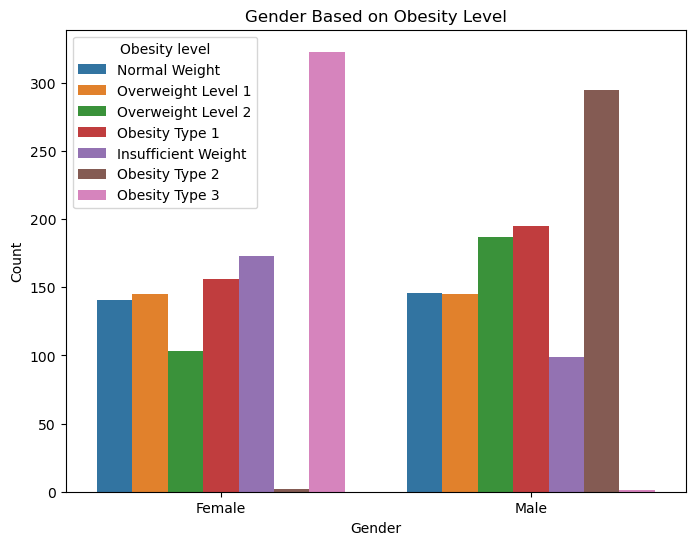

In [29]:
# Count plot for gender based on Obesity level
plt.figure(figsize=(8, 6))
sns.countplot(data=obesity_data, x='Gender', hue='Obesity level')
plt.title('Gender Based on Obesity Level')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig('images/gender_based_obesity_level.png')
plt.show()

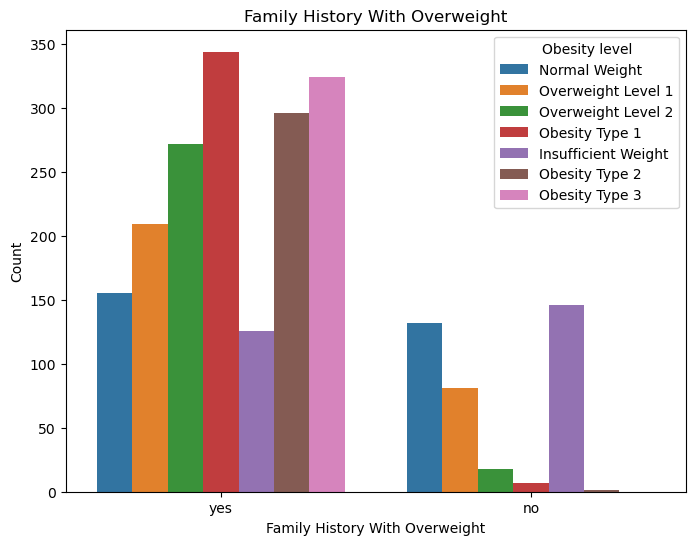

In [30]:
# Count plot for Family History With Overweight based on Obesity level
plt.figure(figsize=(8, 6))
sns.countplot(data=obesity_data, x='Family History With Overweight', hue='Obesity level')
plt.title('Family History With Overweight')
plt.ylabel('Count')
plt.savefig('images/family_history_with_overweight_based_on_obesity.png')
plt.show()

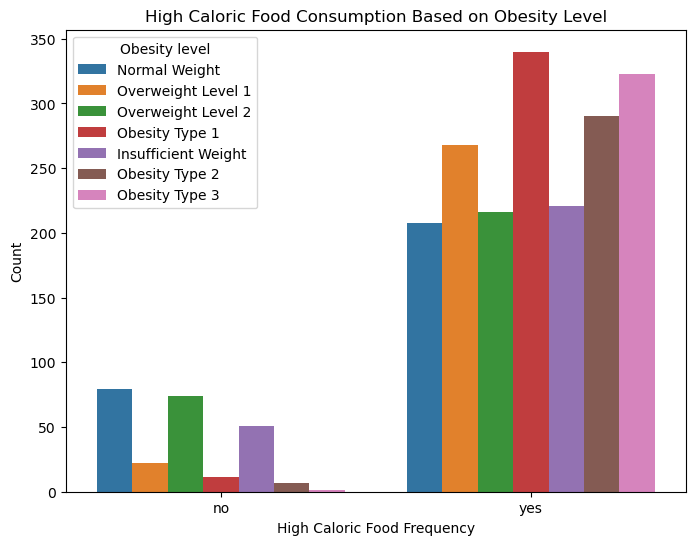

In [31]:
# Count plot for High Caloric Food Frequency based on Obesity level
plt.figure(figsize=(8, 6))
sns.countplot(data=obesity_data, x='High Caloric Food Frequency', hue='Obesity level')
plt.title('High Caloric Food Consumption Based on Obesity Level')
plt.ylabel('Count')
plt.savefig('images/high_calari_food_based_on_obesity.png')
plt.show()

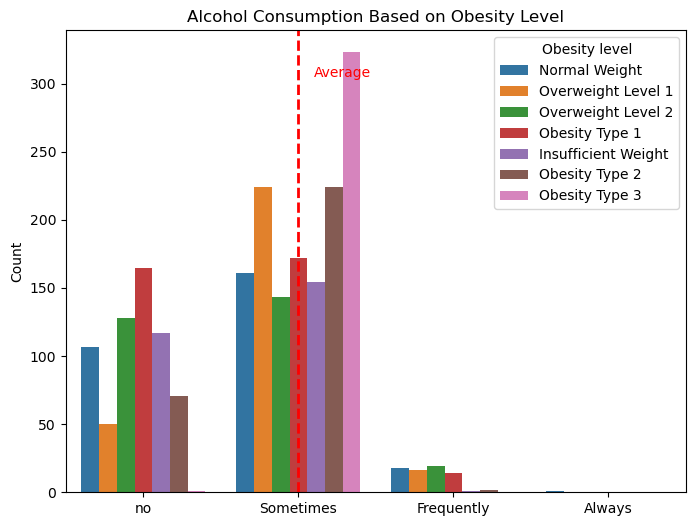

In [38]:
# Calculate the average alcohol consumption
average_alcohol_consumption = round(obesity_data['Alcohol Consumption Numeric'].mean())

# Count plot for Do You Drink Alcohol based on Obesity level
plt.figure(figsize=(8, 6))
sns.countplot(data=obesity_data, x='Do You Drink Alcohol', hue='Obesity level')
plt.title('Alcohol Consumption Based on Obesity Level')
plt.xlabel('')
plt.ylabel('Count')

# Add the average line to the histogram
plt.axvline(average_alcohol_consumption, color='r', linestyle='dashed', linewidth=2)
plt.text(average_alcohol_consumption + 0.1, plt.ylim()[1] * 0.9, f'Average', color='r')
plt.savefig('images/alchohol_consumption_based_on_obesity.png')
plt.show()

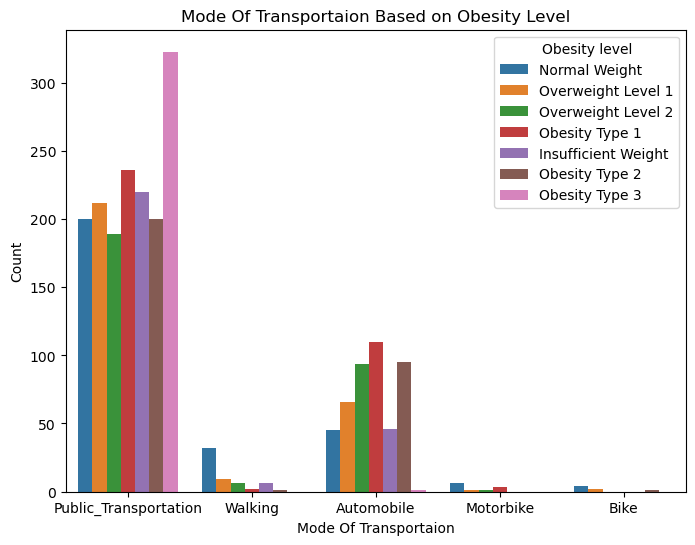

In [39]:
# Count plot for Mode Of Transportaion based on Obesity level
plt.figure(figsize=(8, 6))
sns.countplot(data=obesity_data, x='Mode Of Transportaion', hue='Obesity level')
plt.title('Mode Of Transportaion Based on Obesity Level')
plt.ylabel('Count')
plt.savefig('images/mode_of_transportation_based_on_obesity.png')
plt.show()